# Importing Required Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import model_selection

# Data Analysis & Preprocessing

In [2]:
##reading data with pandas
df= pd.read_csv('dataset.csv')
## Taking a peak at the data
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666301628060000,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,4849,301,5,771,8168632633242440000,STAR,0.000115,7255,56597,832
1,1237673706652430000,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,6573,301,6,220,9333948945297330000,STAR,-0.000093,8290,57364,868
2,1237671126974140000,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,5973,301,1,13,3221211255238850000,STAR,0.000165,2861,54583,42
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,GALAXY,0.058155,2002,53471,35
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,GALAXY,0.072210,2123,53793,74


In [3]:
#test if the data contains null values
print('Nan value',df.isnull().sum())

Nan value objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64


In [4]:
#take a look at the column of the dataframe to see the features
df.columns


Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [5]:
#number of data in each class
df['class'].value_counts()

GALAXY    51323
STAR      38096
QSO       10581
Name: class, dtype: int64

### Data Distribution 

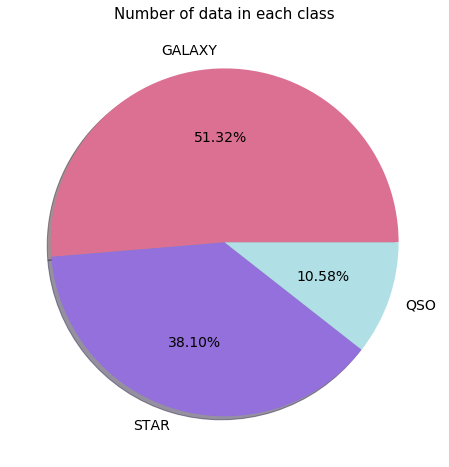

In [6]:
plt.figure(figsize=(8,8))
plt.pie(df["class"].value_counts(),labels=df["class"].value_counts().index,autopct=lambda p:f'{p:.2f}%',
        shadow=True,colors=['palevioletred','mediumpurple','powderblue'],labeldistance = 1.1,textprops={'fontsize': 14})

plt.title("Number of data in each class",fontsize = 15, color="black")
plt.savefig("distribution des données dans les différentes classes.png")
plt.show()

#### Note :
Nous observons que la distribution des données dans les 3 classes est déséquilibrée. En outre, nous pouvons voir que la classe des galaxies contient la plus grande quantité de données (plus de 50%), la classe des étoiles environ 39% et la classe des QSO 11%.

 C'est pourquoi nous allons faire un over-resampling, en dupliquant les données dans les classes minoritaires afin d'avoir le même nombre de données que la classe galaxie. Nous ferons cela après avoir divisé notre ensemble en deux sous-ensembles (train et test).

### Features Distribution 

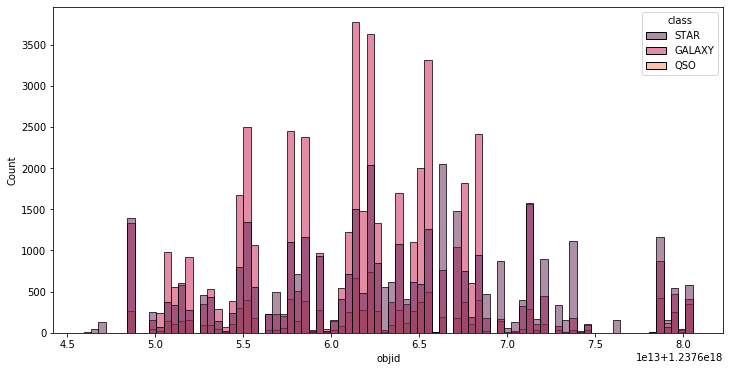

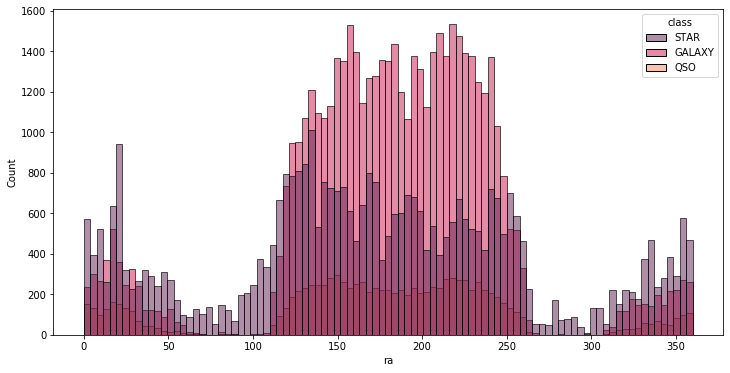

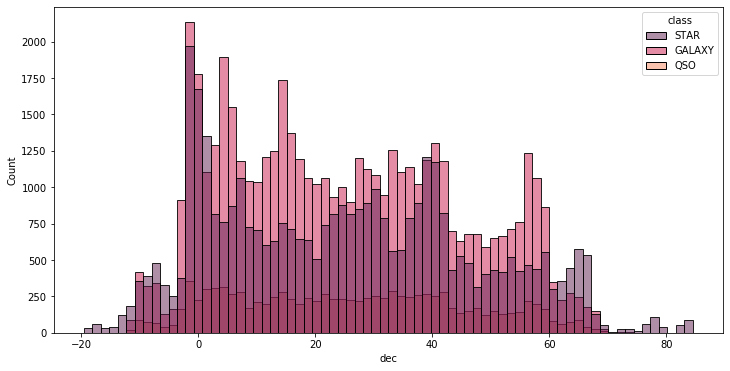

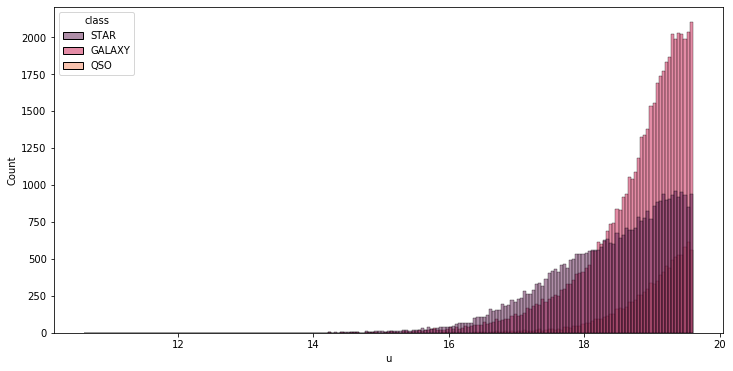

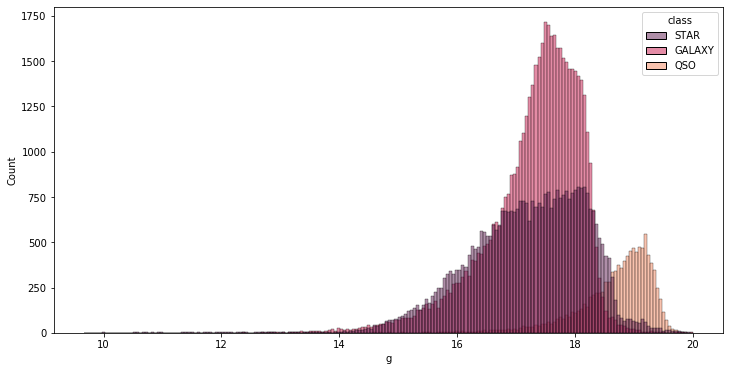

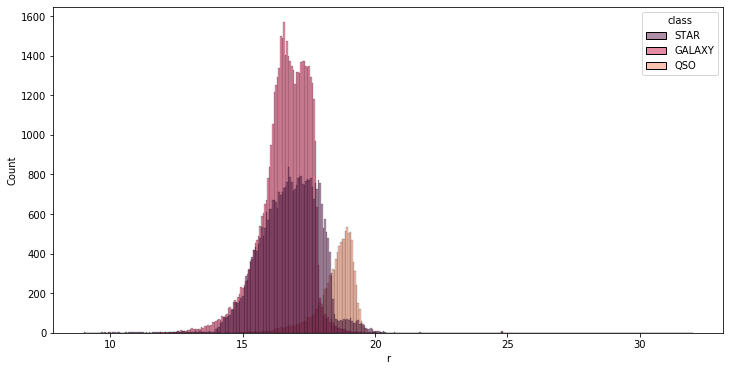

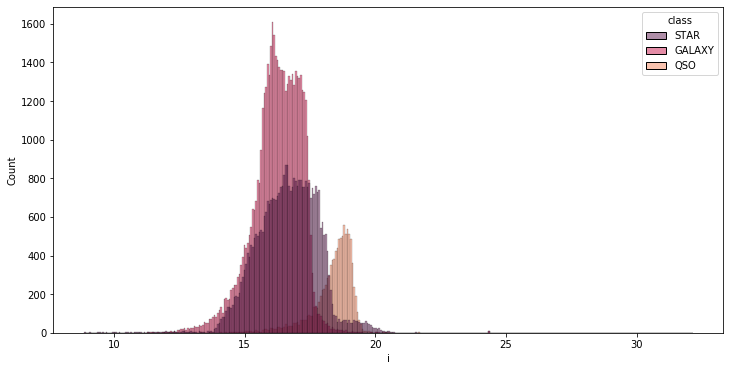

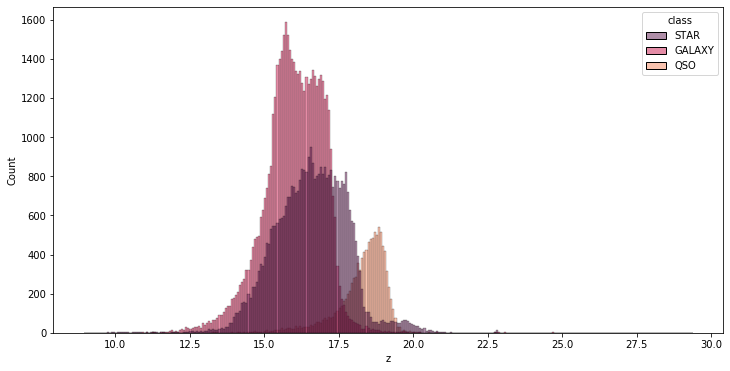

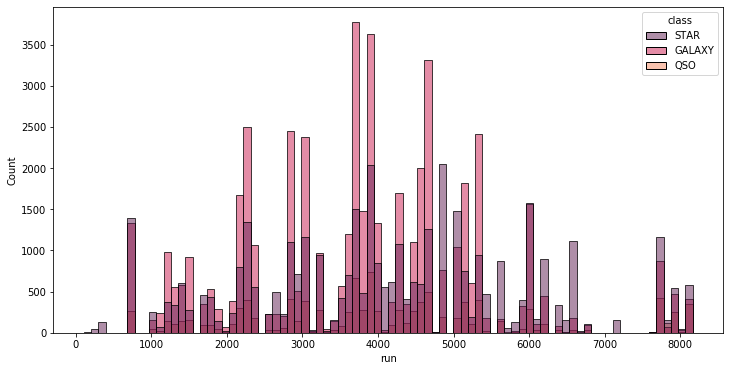

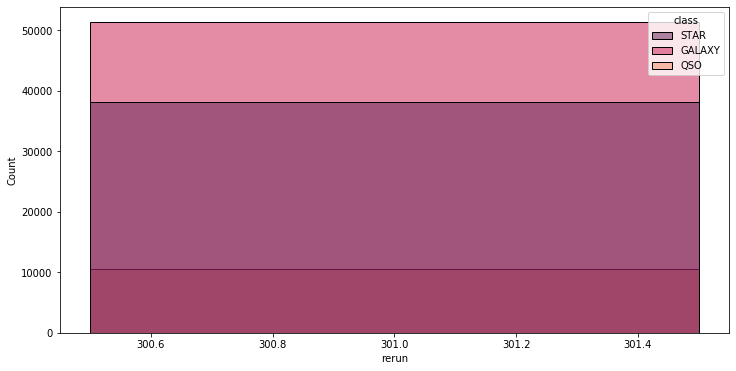

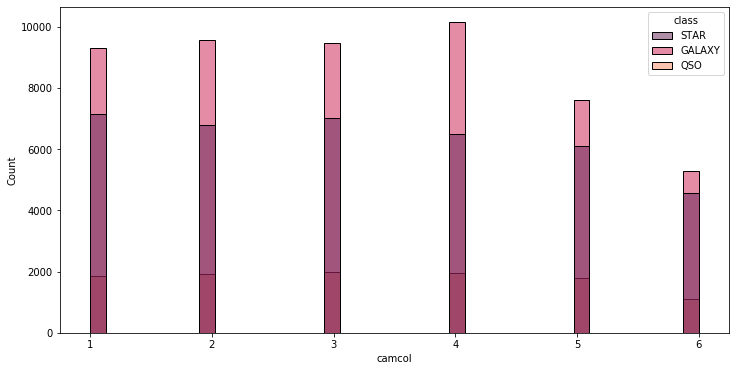

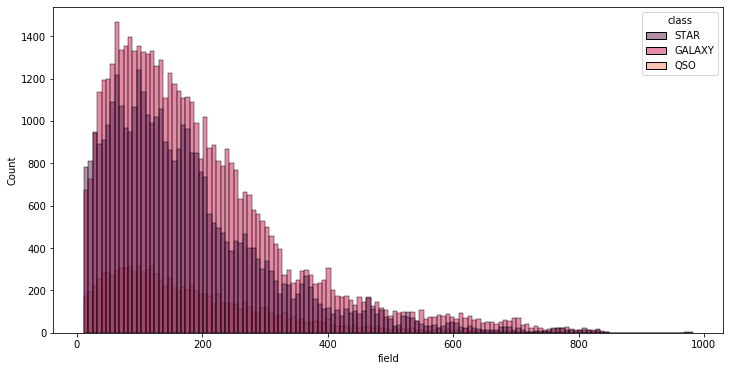

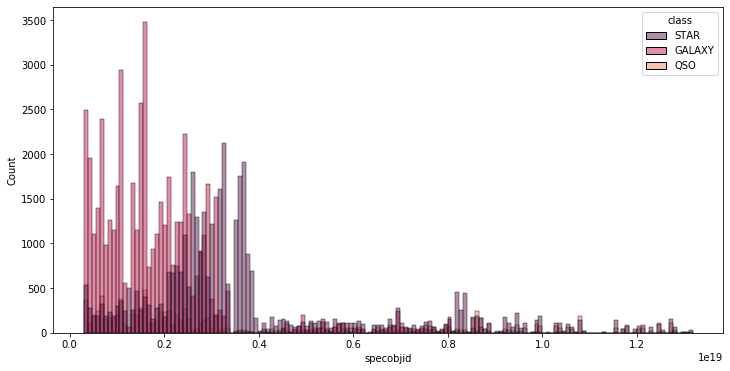

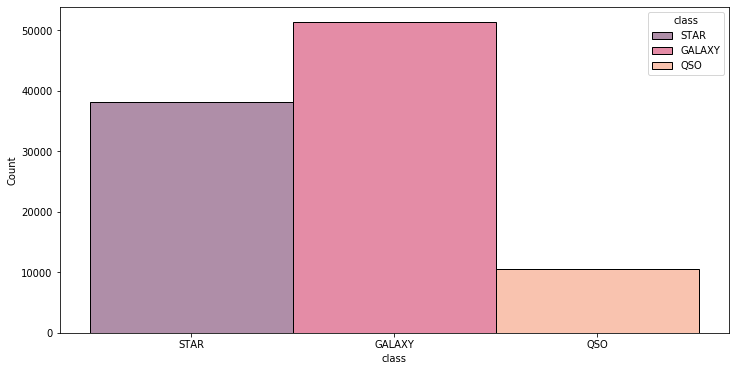

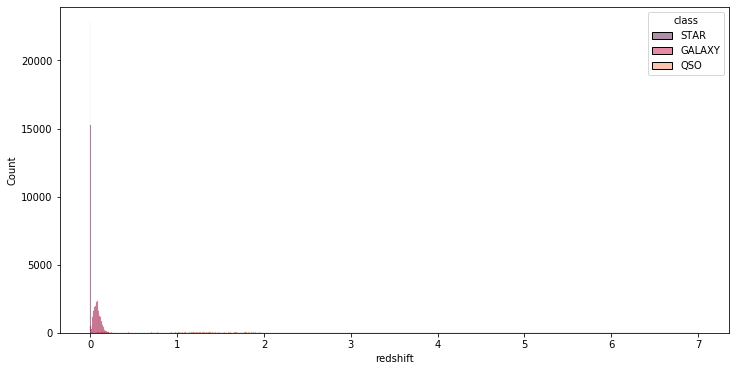

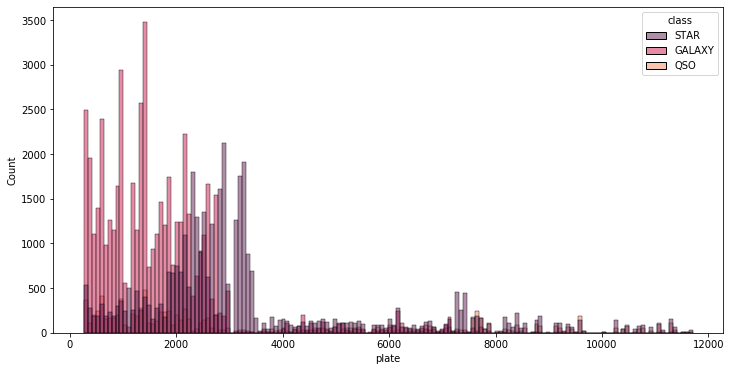

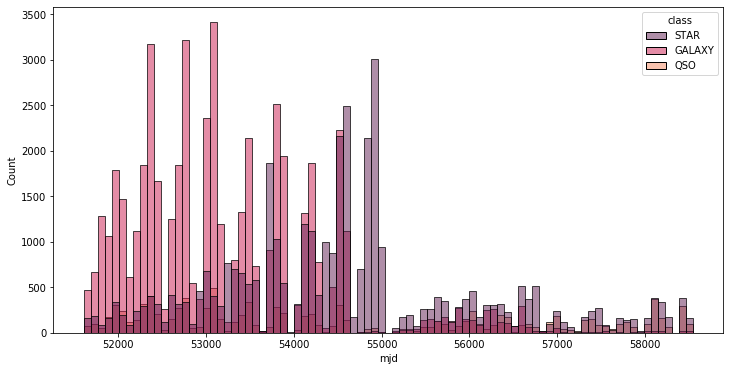

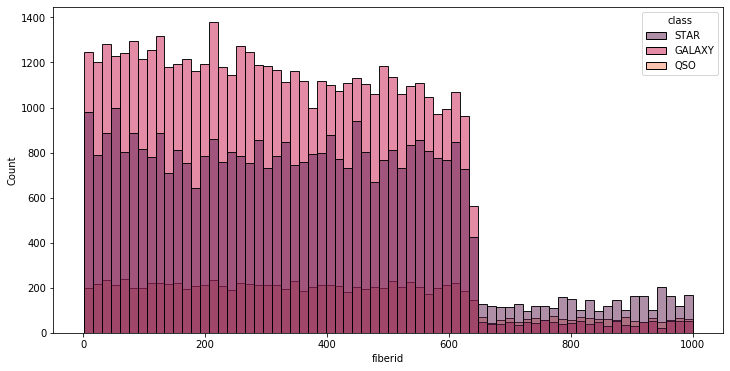

In [7]:
for i in df.columns:
    plt.figure(figsize=(12,6))
    sns.histplot(data = df,x = df[i], hue = 'class', palette='rocket')
   

#### Note : 
Nous remarquons que certaines features sont insignifiantes et n'apportent pas des informations concernanant les caractéristique des objets. 

Les features en question sont : 'objid', 'ra','dec', 'run', 'rerun', 'camcol', 'field','specobjid', 'pl. C'est donc pour cela que nous allons nous séparer d'elles pour la suite.

In [8]:
# we remove useless features by deleting their columns in the data frame
df_features = df.drop(columns=['objid', 'ra','dec', 'run', 'rerun', 'camcol', 'field','specobjid', 'plate', 'mjd', 'fiberid'])
df_features

,u,g,r,i,z,class,redshift
0,18.69254,17.13867,16.55555,16.34662,16.17639,STAR,0.000115
1,18.47633,17.30546,17.24116,17.32780,17.37114,STAR,-0.000093
2,16.47714,15.31072,15.55971,15.72207,15.82471,STAR,0.000165
3,18.63561,16.88346,16.09825,15.70987,15.43491,GALAXY,0.058155
4,18.88325,17.87948,17.47037,17.17441,17.05235,GALAXY,0.072210
...,...,...,...,...,...,...,...
99995,19.32631,18.82748,18.65659,18.60481,18.60917,QSO,0.438182
99996,18.33687,17.30365,17.16037,17.14895,17.14419,STAR,-0.000497
99997,17.50690,15.63152,15.22328,15.04469,15.28668,GALAXY,0.004587
99998,19.33946,17.21436,16.29697,15.86745,15.51556,GALAXY,0.084538


In [9]:
df_features.describe()

,u,g,r,i,z,redshift
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,18.637915,17.407128,16.881676,16.625534,16.467087,0.170621
std,0.832284,0.985921,1.133337,1.209532,1.281788,0.437571
min,10.611810,9.668339,9.005167,8.848403,8.947795,-0.004136
25%,18.212902,16.852982,16.196608,15.865275,15.619960,0.000001
50%,18.873250,17.515860,16.890640,16.599885,16.428385,0.045997
75%,19.273302,18.056060,17.585750,17.344912,17.234625,0.095429
max,19.599950,19.996050,31.990100,32.141470,29.383740,7.011245


### Encoding Class Labels to Integers

In [10]:
# On utilisera l'encoder de scikit-learn
le = preprocessing.LabelEncoder()
labels = le.fit_transform(df_features["class"])

In [11]:
df_features["class"] = labels

### Features correlation

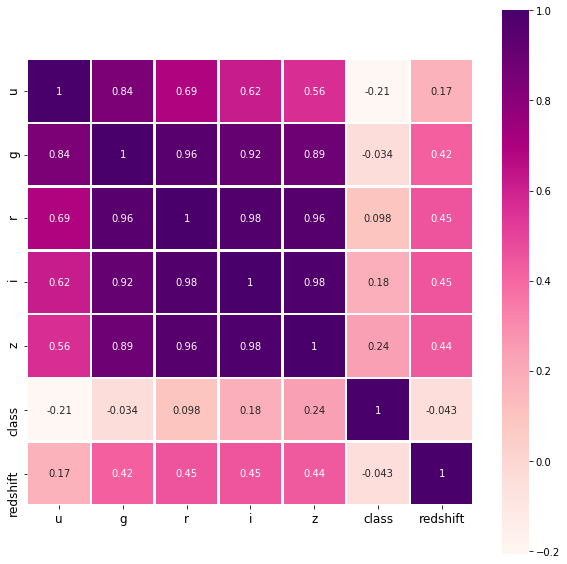

In [12]:
fig=plt.figure(figsize = (10,10))
g=sns.heatmap(df_features.corr(),annot=True, cmap="RdPu",square=True,linewidth=1.5)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12)

plt.savefig('Matrice de corrélation.png') 


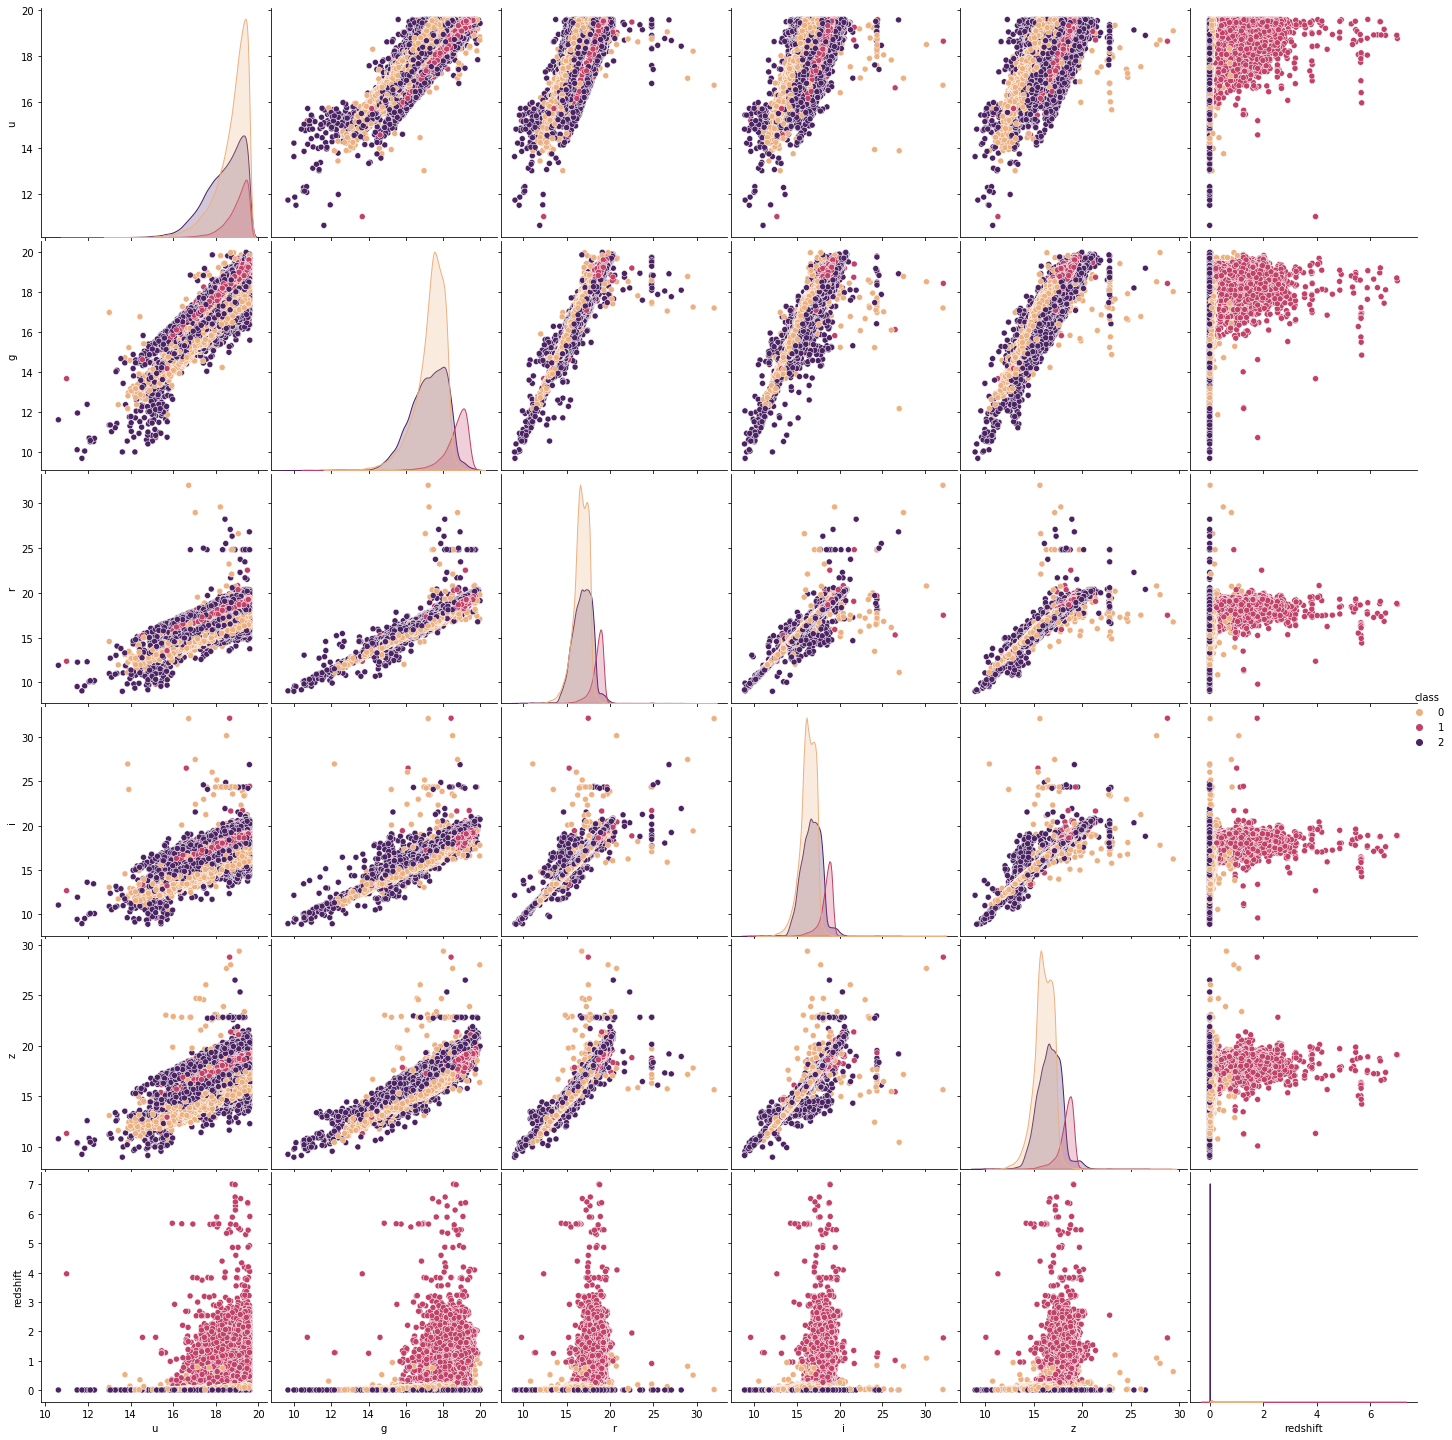

In [13]:
#relation entre les données
g=sns.pairplot(df_features, hue='class', height=8, palette='flare');
g.fig.set_size_inches(20,20)

#### Note : 
Nous constatons que les features u,g,r,i,z sont fortement corrélées. Donc, nous appliquerons sur ces features afin d'avoir une réduction pour avoir une meilleure précision. Nous passerons de 5 features à 3.

### Dimension Reduction using PCA

In [14]:
pca = PCA(n_components = 3)
df_pca = pca.fit_transform(df_features[['u', 'g', 'r', 'i', 'z']])
df_features = pd.concat((df_features, pd.DataFrame(df_pca)), axis=1)
df_features.rename({0:'F1', 1:'F2', 2:'F3'}, axis = 1, inplace = True)
df_features.drop(['u', 'g', 'r', 'i', 'z'], axis=1, inplace=True)
df_features.head(10)

,class,redshift,F1,F2,F3
0,2,0.000115,0.547479,-0.147949,-0.116287
1,2,-0.000093,-0.926386,0.698880,-0.276002
2,2,0.000165,2.837427,1.962139,-0.223020
3,0,0.058155,1.601994,-0.473548,-0.012699
4,0,0.072210,-1.126335,0.021368,0.048978
5,0,0.020701,8.219949,1.146711,0.232663
6,0,0.130948,1.538490,-1.016385,-0.035992
7,0,0.004703,0.913588,1.961008,-0.167508
8,2,-0.000355,1.203102,0.596027,-0.007624
9,0,0.037549,2.814465,0.424675,0.171953


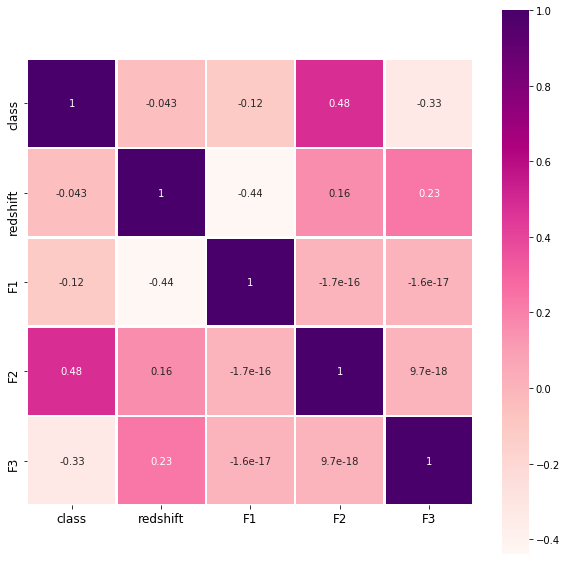

In [15]:
fig=plt.figure(figsize = (10,10))
g=sns.heatmap(df_features.corr(),annot=True, cmap="RdPu",square=True,linewidth=1.5)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12)

plt.savefig('Matrice de corrélation Après PCA.png') 


### Features Standardization

Vue la présence de certaines valeurs aberrantes nous allons mettre à l'échelle les données.

In [16]:
# On utilisera la standarisation de scikit-learn
df_features = df_features.drop(columns=["class"])
scaler = preprocessing.StandardScaler()
scaled_features = scaler.fit_transform(df_features)
scaled_features

array([[-0.38966862,  0.23347984, -0.21382663, -0.60606879],
       [-0.39014263, -0.39507011,  1.01007569, -1.43847468],
       [-0.38955451,  1.21006022,  2.83583483, -1.16234305],
       ...,
       [-0.37944848,  1.37959326,  0.9006508 , -2.27708373],
       [-0.19673194,  0.45615958, -1.57213028, -0.50208922],
       [-0.390124  ,  0.50458003,  0.36870541, -0.03309118]])

In [17]:
scaled_features.shape

(100000, 4)

In [18]:
df_features.columns

Index(['redshift', 'F1', 'F2', 'F3'], dtype='object')

In [19]:
# Convert numpy array to panda dataframe
df_temp = pd.DataFrame(scaled_features, columns=df_features.columns)
df_temp

,redshift,F1,F2,F3
0,-0.389669,0.233480,-0.213827,-0.606069
1,-0.390143,-0.395070,1.010076,-1.438475
2,-0.389555,1.210060,2.835835,-1.162343
3,-0.257025,0.683193,-0.684408,-0.066186
4,-0.224904,-0.480341,0.030883,0.255263
...,...,...,...,...
99995,0.611473,-1.597692,0.480545,-0.178034
99996,-0.391067,-0.272927,0.984004,-0.755604
99997,-0.379448,1.379593,0.900651,-2.277084
99998,-0.196732,0.456160,-1.572130,-0.502089


### Splitting Data into Train & Test Set

In [20]:
# Décomposition de notre jeu de données en ensemble d'entrainement+validation et en un ensemble de test 
test_ratio = 0.2
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(df_temp, labels, test_size = test_ratio)
X_train

,redshift,F1,F2,F3
72653,-0.335352,-0.776857,0.365288,-0.265223
18199,-0.276407,0.059908,0.144898,0.152121
54323,-0.390136,1.205765,-0.804157,-1.249998
77430,3.455644,-1.475235,0.921863,1.288420
44348,-0.286438,-0.568186,-0.736196,-0.005501
...,...,...,...,...
73308,-0.390228,0.427403,0.281182,-0.850544
99477,-0.206976,0.031358,-1.476815,0.104397
63308,-0.219742,1.358539,-1.150734,0.146928
43125,-0.206292,1.592341,0.067414,0.769814


In [21]:
train_set = X_train
train_set.insert(0, "class", Y_train, True)
train_set

,class,redshift,F1,F2,F3
72653,0,-0.335352,-0.776857,0.365288,-0.265223
18199,0,-0.276407,0.059908,0.144898,0.152121
54323,2,-0.390136,1.205765,-0.804157,-1.249998
77430,1,3.455644,-1.475235,0.921863,1.288420
44348,0,-0.286438,-0.568186,-0.736196,-0.005501
...,...,...,...,...,...
73308,2,-0.390228,0.427403,0.281182,-0.850544
99477,0,-0.206976,0.031358,-1.476815,0.104397
63308,0,-0.219742,1.358539,-1.150734,0.146928
43125,0,-0.206292,1.592341,0.067414,0.769814


### Resampling Data
Comme cité au début, nous effectuerons un réequilibrage sur l'ensemble d'entraînement.

In [22]:
class0,class1,class2 = train_set[train_set['class'] == 0],train_set[train_set['class'] == 1],train_set[train_set['class'] == 2]
count_class_0, count_class_1,count_class_2 = X_train['class'].value_counts()
count_class_0, count_class_1,count_class_2

(41004, 30573, 8423)

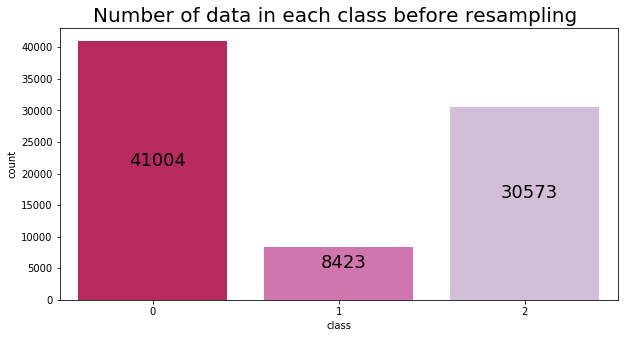

In [23]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="class", data=train_set, palette='PuRd_r')
plt.title('Number of data in each class before resampling ', fontsize=20)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()/2), 
    ha = 'center', va = 'center', xytext = (5, 10), textcoords = 'offset points',size=18,color='black')

In [24]:
class1_sampled = class1.sample(count_class_0, replace=True) #le .sample permet d'avoir des objets randoms
class2_sampled = class2.sample(count_class_0, replace=True)

train_set_resampled = pd.concat([class0, class1_sampled,class2_sampled], axis=0)

print('After Random over-sampling:')
print(train_set_resampled['class'].value_counts())


After Random over-sampling:
2    41004
1    41004
0    41004
Name: class, dtype: int64


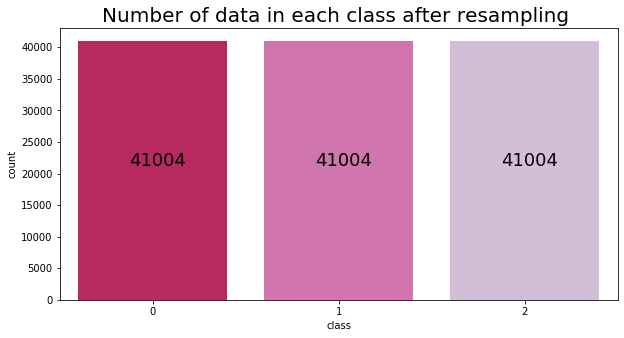

In [25]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="class", data=train_set_resampled, palette='PuRd_r')
plt.title('Number of data in each class after resampling ', fontsize=20)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()/2), 
    ha = 'center', va = 'center', xytext = (5, 10), textcoords = 'offset points',size=18,color='black')

In [26]:
Y_train = train_set_resampled['class']
X_train = train_set_resampled.drop(columns=["class"])